c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


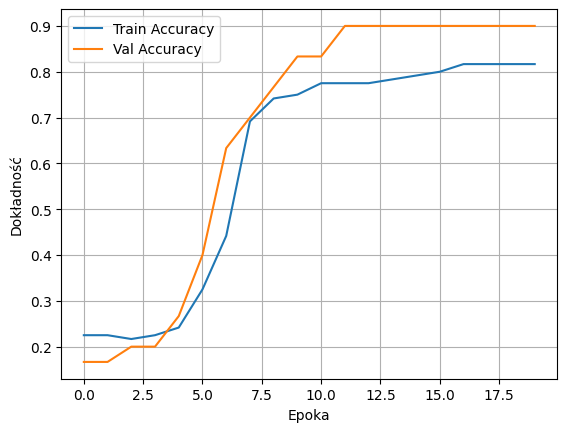

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_dense = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_dense.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dense = model_dense.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

plt.plot(history_dense.history['accuracy'], label='Train Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid()
plt.show()



c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


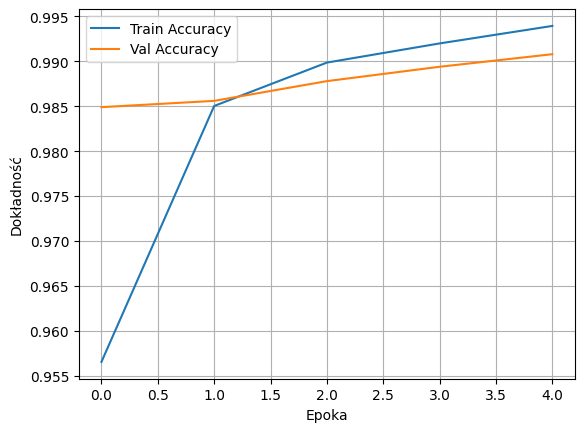

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid()
plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


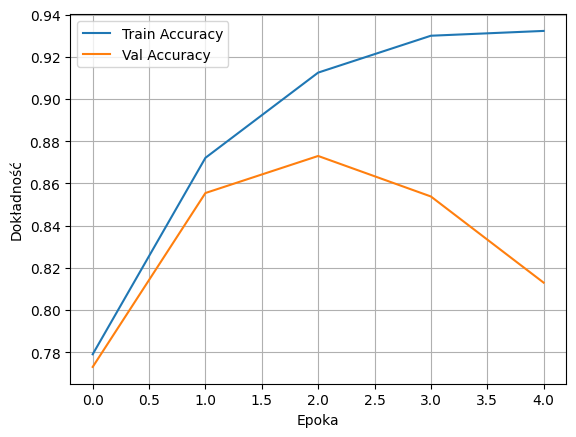

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid()
plt.show()